## Exercise/Example: the biggest Earthquake in the UK this Century

### The Problem

GeoJSON is a json-based file format for sharing geographic data. One example dataset is the USGS earthquake data:

In [4]:
import requests
quakes=requests.get("http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
                    params={
        'starttime':"2000-01-01",
        "maxlatitude":"58.723",
        "minlatitude":"50.008",
        "maxlongitude":"1.67",
        "minlongitude":"-9.756",
        "minmagnitude":"1",
        "endtime":"2016-10-27",
        "orderby":"time-asc"}
                   )

In [5]:
quakes.text[0:100]

'{"type":"FeatureCollection","metadata":{"generated":1665079143000,"url":"https://earthquake.usgs.gov'

Your exercise: determine the location of the largest magnitude earthquake in the UK this century.

You'll need to:
* Get the text of the web result
* Parse the data as JSON
* Understand how the data is structured into dictionaries and lists
   * Where is the magnitude?
   * Where is the place description or coordinates?
* Program a search through all the quakes to find the biggest quake.
* Find the place of the biggest quake
* Form a URL for Google Maps at that latitude and longitude: look back at the introductory example
* Display that image

In [6]:
type(quakes)

requests.models.Response

In [7]:
type(quakes.text)

str

In [8]:
# use the json library to parse str to dict
import json
raw_database = json.loads(quakes.text)
type(raw_database)

dict

In [9]:
# inspect the keys to see where the relevant info could be 
raw_database.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [10]:
# are presumably stored in features, let's inspect that
features = raw_database['features']
#len(features)
## Looks like there are 111 entries, presumably corresponding to all the quakes
#features[90]['properties']['mag'] # this is how you access the magnitude 

list_of_mags = [quake['properties']['mag'] for quake in features]

In [11]:
#features[90]['properties']

19


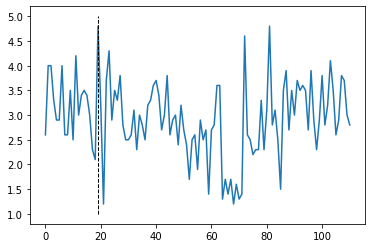

In [12]:
# for visualization, plot the magnitudes 
import matplotlib.pyplot as plt
import numpy as np

i=np.argmax(list_of_mags)
print(i)

plt.plot(list_of_mags)
plt.plot([i, i], [1, 5], color='k', linestyle='--', linewidth=1)
plt.show()


In [13]:
#Find the place of the biggest quake
i=np.argmax(list_of_mags)

print(features[i]['properties']['place'])


2 km ESE of Wombourn, United Kingdom


In [16]:
# find geocoordinates 
print(features[i])

{'type': 'Feature', 'properties': {'mag': 4.8, 'place': '2 km ESE of Wombourn, United Kingdom', 'time': 1032738794600, 'updated': 1600455819229, 'tz': None, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000bcxg', 'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp000bcxg&format=geojson', 'felt': None, 'cdi': None, 'mmi': 6.161, 'alert': None, 'status': 'reviewed', 'tsunami': 0, 'sig': 354, 'net': 'us', 'code': 'p000bcxg', 'ids': ',usp000bcxg,atlas20020922235314,', 'sources': ',us,atlas,', 'types': ',impact-text,origin,phase-data,shakemap,trump-shakemap,', 'nst': 268, 'dmin': None, 'rms': None, 'gap': None, 'magType': 'mb', 'type': 'earthquake', 'title': 'M 4.8 - 2 km ESE of Wombourn, United Kingdom'}, 'geometry': {'type': 'Point', 'coordinates': [-2.15, 52.52, 9.4]}, 'id': 'usp000bcxg'}


In [15]:
import geopy

geocoder=geopy.geocoders.GoogleV3(domain="maps.google.co.uk")
geocoder.geocode('Wombourn', exactly_one=False)

ConfigurationError: Since July 2018 Google requires each request to have an API key. Pass a valid `api_key` to GoogleV3 geocoder to fix this error. See https://developers.google.com/maps/documentation/geocoding/usage-and-billing

In [48]:
import requests
def request_map_at(lat,long, satellite=True,
                   zoom=10, size=(400,400), sensor=False):
  base="http://maps.googleapis.com/maps/api/staticmap?"
  
  params=dict(
    sensor= str(sensor).lower(),
    zoom= zoom,
    size= str(size[0])+"x"+str(size[1]),
    center = str(lat)+","+str(long),
    style="feature:all|element:labels|visibility:off"
  )
  if satellite:
    params["maptype"]="satellite"

  return requests.get(base,params=params)

2